In [64]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_score, recall_score, f1_score
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.svm import SVC
import seaborn as sns 

dataset = load_digits()
X, y = dataset.data, dataset.target
X_train_mc, X_test_mc, y_train_mc, y_test_mc = train_test_split(X, y, random_state = 0)

In [65]:
clf = SVC(kernel = 'linear').fit(X_train_mc, y_train_mc)
clf_y_prediction = clf.predict(X_test_mc)
confusion_mx = confusion_matrix(y_test_mc, clf_y_prediction)
confusion_mx

array([[37,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 42,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0, 44,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 43,  0,  0,  0,  0,  1,  1],
       [ 0,  0,  0,  0, 38,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 47,  0,  0,  0,  1],
       [ 0,  1,  0,  0,  0,  0, 51,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0, 47,  0,  0],
       [ 0,  3,  1,  0,  0,  0,  0,  0, 44,  0],
       [ 0,  0,  0,  1,  0,  1,  0,  0,  1, 44]])

In [66]:
df_cm = pd.DataFrame(confusion_mx, index = [i for i in range(0,10,1)], columns=[i for i in range(0, 10, 1)])
df_cm

,0,1,2,3,4,5,6,7,8,9
0,37,0,0,0,0,0,0,0,0,0
1,0,42,0,0,0,0,0,0,1,0
2,0,0,44,0,0,0,0,0,0,0
3,0,0,0,43,0,0,0,0,1,1
4,0,0,0,0,38,0,0,0,0,0
5,0,0,0,0,0,47,0,0,0,1
6,0,1,0,0,0,0,51,0,0,0
7,0,0,0,0,1,0,0,47,0,0
8,0,3,1,0,0,0,0,0,44,0
9,0,0,0,1,0,1,0,0,1,44


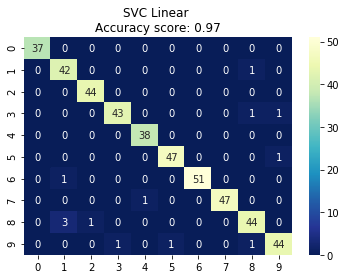

In [67]:
plt.plot(figsize = (4,4))
plt.title('SVC Linear \nAccuracy score: {:.2f}'.format(accuracy_score(y_test_mc, clf_y_prediction)))
plt.xlabel('Predicted label')
plt.ylabel('True label')
sns.heatmap(df_cm, annot=True, cmap='YlGnBu_r')

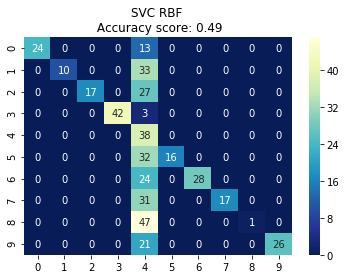

In [68]:
clf_rbf = SVC(kernel = 'rbf', gamma='auto').fit(X_train_mc, y_train_mc)
clf_rbf_y_predicted = clf_rbf.predict(X_test_mc)
rbf_confusion_mx = confusion_matrix(y_test_mc, clf_rbf_y_predicted)
df_rbf_cm = pd.DataFrame(rbf_confusion_mx, index = [i for i in range(0,10,1)], columns=[i for i in range(0,10,1)])
plt.plot(figsize = (4,4))
plt.title('SVC RBF \n Accuracy score: {:.2f}'.format(accuracy_score(y_test_mc, clf_rbf_y_predicted)))
plt.xlabel('Predicted label')
plt.ylabel('True label')
sns.heatmap(df_rbf_cm, annot=True, cmap='YlGnBu_r')

## Multiclass Classification Report

In [69]:
print(classification_report(y_test_mc, clf_rbf_y_predicted))

              precision    recall  f1-score   support

           0       1.00      0.65      0.79        37
           1       1.00      0.23      0.38        43
           2       1.00      0.39      0.56        44
           3       1.00      0.93      0.97        45
           4       0.14      1.00      0.25        38
           5       1.00      0.33      0.50        48
           6       1.00      0.54      0.70        52
           7       1.00      0.35      0.52        48
           8       1.00      0.02      0.04        48
           9       1.00      0.55      0.71        47

   micro avg       0.49      0.49      0.49       450
   macro avg       0.91      0.50      0.54       450
weighted avg       0.93      0.49      0.54       450



### Micro and Macro averaging

In [73]:
print('Precision score {:.2f} (treat instances equally)'.format(precision_score(y_test_mc, clf_rbf_y_predicted, average= 'micro')))
print('Precision score {:.2f} (treat classes equally)'.format(precision_score(y_test_mc, clf_rbf_y_predicted, average= 'macro')))

Precision score 0.49 (treat instances equally)
Precision score 0.91 (treat classes equally)
